In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

## Representação uniforme

In [ ]:
#Função do circulo

cx = 0.3
cy = 0.4
r = 0.21

def inside_circle(x, y):
    return (x - cx)** 2 + (y - cy)**2 <= r**2

In [ ]:
#Classificar se um quadrado está dentro ou fora
#Parcialmente errado (casos 1 e 2)

def classify(x, y, p):
    
    corners = [(x, y), (x+p, y), (x+p, y+p), (x, y+p)]

    c = 0
    for xp, yp in corners:
        if inside_circle(xp, yp):
            c+=1

    if c == 4:
        return 'inside'
    elif c == 0:
        return 'outside'
    else:
        return 'numsei'

In [ ]:
def draw(ax, xi, yi, profundidade):
    p = 1/profundidade #Distancia entre cada aresta
    
    for i in range(profundidade):
        for j in range(profundidade):
            px = i/profundidade #Passo de x
            py = j/profundidade #Passo de y

            classificacao = classify(xi+ px, yi+ py, p)

            if classificacao == 'outside':
                reta = patches.Rectangle((xi+px, yi+py), p, p, facecolor='#6fa8ff', edgecolor='black')
                ax.add_patch(reta)

            if classificacao == 'inside':
                reta = patches.Rectangle((xi+px, yi+py), p, p, facecolor='#e06666', edgecolor='black')
                ax.add_patch(reta)

            if classificacao == 'numsei':
                reta = patches.Rectangle((xi + px, yi + py), p, p,facecolor='#b7b7b7', edgecolor='black')
                ax.add_patch(reta)


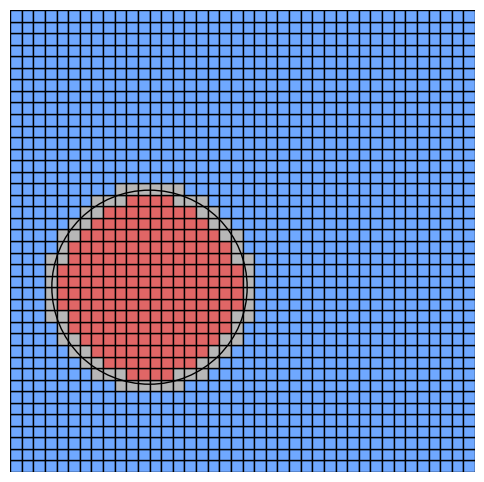

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

draw(ax, 0.0, 0.0, 40)

circle = plt.Circle((0.3, 0.4), 0.21, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.axis('off')

plt.show()

### Correção

In [ ]:
def dist_min(x, y, cx, cy, p):
    dx = max(x-cx, 0, cx-x-p)
    dy = max(y-cy, 0, cy-y-p)
    
    return math.sqrt(dx**2 + dy**2)

def dist_max(x, y, cx, cy, p):
    corners = [(x, y), (x+p, y), (x+p, y+p), (x, y+p)]
    dist = [math.dist((cx, cy), c) for c in corners]

    return max(dist)

In [ ]:
def classify(x, y, p):
    
    dmin = dist_min(x, y, cx, cy, p)
    dmax = dist_max(x, y, cx, cy, p)

    if dmin > r:
        return 'outside'
    elif dmax < r:
        return 'inside'
    else:
        return 'numsei'

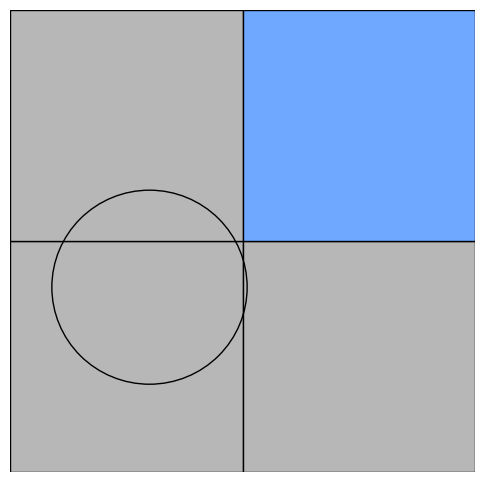

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

draw(ax, 0.0, 0.0, 2)

circle = plt.Circle((0.3, 0.4), 0.21, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.axis('off')

plt.show()

## Representação adaptativa